In [10]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [11]:
df = pd.read_csv('Blog_processed.csv')
df.head()

id gender  age              topic      sign          date  \
0  2059027   male   15            Student       Leo   14,May,2004   
1  2059027   male   15            Student       Leo   13,May,2004   
2  2059027   male   15            Student       Leo   12,May,2004   
3  2059027   male   15            Student       Leo   12,May,2004   
4  3581210   male   33  InvestmentBanking  Aquarius  11,June,2004   

                                                text  \
0             Info has been found (+/- 100 pages,...   
1             These are the team members:   Drewe...   
2             In het kader van kernfusie op aarde...   
3                   testing!!!  testing!!!             
4               Thanks to Yahoo!'s Toolbar I can ...   

                               processed_text_string  
0  info page file wait until team leader process ...  
1  team member drew laag urllink mail ruiyu urlli...  
2  kader kernfusi aard maak eigen waterstofbom bu...  
3                                          test test  
4  thank yahoo toolbar captur url popup mean cool...

In [3]:
data = df['processed_text_string'].iloc[:100000]

In [4]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['info', 'page', 'file', 'wait', 'until', 'team', 'leader', 'process', 'learn', 'html']]


In [5]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['info', 'page', 'file', 'wait', 'until', 'team', 'leader', 'process', 'learn', 'html']


In [6]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [7]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [8]:
data_words_nostops

[['info',
  'page',
  'file',
  'wait',
  'team',
  'leader',
  'process',
  'learn',
  'html'],
 ['team',
  'member',
  'drew',
  'laag',
  'urllink',
  'mail',
  'ruiyu',
  'urllink',
  'mail',
  'bryan',
  'aalder',
  'urllink',
  'mail'],
 ['kader',
  'kernfusi',
  'aard',
  'maak',
  'eigen',
  'waterstofbom',
  'build',
  'bomb',
  'ascott',
  'tartaru',
  'andrew',
  'scott',
  'newsgroup',
  'humor',
  'subject',
  'build',
  'bomb',
  'humor',
  'date',
  'organ',
  'univers',
  'western',
  'australia',
  'origin',
  'file',
  'date',
  'novemb',
  'transcript',
  'seven',
  'day',
  'articl',
  'poorli',
  'format',
  'corrupt',
  'add',
  'text',
  'examin',
  'microscop',
  'malleabl',
  'like',
  'gold',
  'miss',
  'text',
  'distribut',
  'respons',
  'accuraci',
  'inform',
  'convert',
  'html',
  'dionisio',
  'infinet',
  'littl',
  'spell',
  'check',
  'minor',
  'edit',
  'steal',
  'urllink',
  'http',
  'ohio',
  'voyag',
  'dionisio',
  'bomb',
  'html',
  're

In [9]:
data_words_bigrams

[['info',
  'page',
  'file',
  'wait',
  'team',
  'leader',
  'process',
  'learn',
  'html'],
 ['team',
  'member',
  'drew',
  'laag',
  'urllink',
  'mail',
  'ruiyu',
  'urllink',
  'mail',
  'bryan',
  'aalder',
  'urllink',
  'mail'],
 ['kader',
  'kernfusi',
  'aard',
  'maak',
  'eigen',
  'waterstofbom',
  'build',
  'bomb',
  'ascott',
  'tartaru',
  'andrew',
  'scott',
  'newsgroup',
  'humor',
  'subject',
  'build',
  'bomb',
  'humor',
  'date',
  'organ',
  'univers',
  'western',
  'australia',
  'origin',
  'file',
  'date',
  'novemb',
  'transcript',
  'seven',
  'day',
  'articl',
  'poorli',
  'format',
  'corrupt',
  'add',
  'text',
  'examin',
  'microscop',
  'malleabl',
  'like',
  'gold',
  'miss',
  'text',
  'distribut',
  'respons',
  'accuraci',
  'inform',
  'convert',
  'html',
  'dionisio',
  'infinet',
  'littl',
  'spell',
  'check',
  'minor',
  'edit',
  'steal',
  'urllink',
  'http',
  'ohio',
  'voyag',
  'dionisio',
  'bomb',
  'html',
  're

In [10]:
import en_core_web_md
nlp = en_core_web_md.load()

In [11]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

KeyboardInterrupt: 

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

In [10]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('file', 1),
  ('html', 1),
  ('info', 1),
  ('leader', 1),
  ('learn', 1),
  ('page', 1),
  ('process', 1),
  ('team', 1),
  ('wait', 1)]]

In [1]:
import pickle
corps = open("New folder/crpus.txt", "rb")
corpus = pickle.load(corps)

data_lemm = open("New folder/data_lemm.txt", "rb")
data_lemmatized = pickle.load(data_lemm)

id2wd = open("New folder/id2wd.txt", "rb")
id2word = pickle.load(id2wd)

In [4]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(7, 1), (9, 1), (10, 2), (11, 1)],
 [(1, 2),
  (6, 3),
  (12, 1),
  (13, 3),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 4),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 4),
  (28, 3),
  (29, 1),
  (30, 2),
  (31, 4),
  (32, 3),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 2),
  (37, 1),
  (38, 1),
  (39, 4),
  (40, 1),
  (41, 2),
  (42, 51),
  (43, 1),
  (44, 6),
  (45, 1),
  (46, 1),
  (47, 2),
  (48, 1),
  (49, 3),
  (50, 1),
  (51, 6),
  (52, 2),
  (53, 4),
  (54, 2),
  (55, 1),
  (56, 3),
  (57, 5),
  (58, 2),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 4),
  (64, 1),
  (65, 1),
  (66, 7),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 5),
  (88, 1),
  (89, 4),
  (90, 4)

In [5]:
data_lemmatized

[['info',
  'page',
  'file',
  'wait',
  'team',
  'leader',
  'process',
  'learn',
  'html'],
 ['team', 'member', 'draw', 'mail', 'mail'],
 ['humor',
  'subject',
  'build',
  'bomb',
  'humor',
  'date',
  'day',
  'format',
  'add',
  'text',
  'text',
  'convert',
  'html',
  'spell',
  'check',
  'minor',
  'edit',
  'steal',
  'reformat',
  'html',
  'strict',
  'build',
  'bomb',
  'make',
  'bomb',
  'kind',
  'real',
  'seek',
  'want',
  'victim',
  'nuclear',
  'effort',
  'activ',
  'particip',
  'bomb',
  'shelter',
  'loser',
  'want',
  'eat',
  'spam',
  'winner',
  'want',
  'push',
  'button',
  'make',
  'bomb',
  'step',
  'nuclear',
  'assert',
  'train',
  'call',
  'take',
  'charg',
  'sure',
  'enjoy',
  'risk',
  'thrill',
  'play',
  'nuclear',
  'chicken',
  'feed',
  'clamp',
  'progress',
  'publish',
  'hydrogen',
  'true',
  'atom',
  'hydrogen',
  'bomb',
  'simpl',
  'build',
  'bomb',
  'kitchen',
  'day',
  'food',
  'editor',
  'nuclear',
  'scien

In [6]:
id2word

In [2]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('file', 1),
  ('html', 1),
  ('info', 1),
  ('leader', 1),
  ('learn', 1),
  ('page', 1),
  ('process', 1),
  ('team', 1),
  ('wait', 1)]]

In [7]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
import gensim

In [8]:
def lemmatize_stemming(text):
    return ps.stem(WordNetLemmatizer().lemmatize(text, pos=['a','v']))

In [9]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [12]:
proc_text = [x.split() for x in df['processed_text_string'].astype(str)]
proc_text # data_lemmatized

[['info',
  'page',
  'file',
  'wait',
  'until',
  'team',
  'leader',
  'process',
  'learn',
  'html'],
 ['team',
  'member',
  'drew',
  'laag',
  'urllink',
  'mail',
  'ruiyu',
  'urllink',
  'mail',
  'bryan',
  'aalder',
  'urllink',
  'mail'],
 ['kader',
  'kernfusi',
  'aard',
  'maak',
  'eigen',
  'waterstofbom',
  'build',
  'bomb',
  'ascott',
  'tartaru',
  'andrew',
  'scott',
  'newsgroup',
  'humor',
  'subject',
  'build',
  'bomb',
  'humor',
  'date',
  'organ',
  'univers',
  'western',
  'australia',
  'origin',
  'file',
  'date',
  'novemb',
  'transcript',
  'seven',
  'day',
  'articl',
  'poorli',
  'format',
  'corrupt',
  'add',
  'text',
  'examin',
  'microscop',
  'malleabl',
  'like',
  'gold',
  'miss',
  'text',
  'distribut',
  'respons',
  'accuraci',
  'inform',
  'convert',
  'html',
  'dionisio',
  'infinet',
  'littl',
  'spell',
  'check',
  'minor',
  'edit',
  'steal',
  'urllink',
  'http',
  'ohio',
  'voyag',
  'dionisio',
  'bomb',
  'h

In [13]:
dictionary = gensim.corpora.Dictionary(proc_text)
dictionary # id2word

In [14]:
dictionary.filter_extremes(no_below=20, no_above=0.5, keep_n=50000)

In [15]:
bow_corpus = [dictionary.doc2bow(doc) for doc in proc_text]

In [36]:
# # Build LDA model
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=4, 
# #                                            random_state=1,
# #                                            update_every=1,
# #                                            chunksize=100,
#                                            passes=5,
#                                            alpha='auto',
#                                            per_word_topics=True)

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=29, 
                                           random_state=0,
                                           passes=1)

In [37]:
# Print the Keyword in the 29 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[bow_corpus]

[(2,
  '0.033*"think" + 0.029*"peopl" + 0.026*"like" + 0.023*"know" + 0.020*"thing" '
  '+ 0.012*"time" + 0.010*"want" + 0.010*"say" + 0.010*"go" + 0.010*"mean"'),
 (19,
  '0.030*"class" + 0.025*"haha" + 0.024*"today" + 0.020*"test" + '
  '0.017*"school" + 0.017*"studi" + 0.015*"go" + 0.013*"time" + '
  '0.010*"teacher" + 0.010*"exam"'),
 (0,
  '0.495*"urllink" + 0.024*"kerri" + 0.024*"vote" + 0.019*"bush" + '
  '0.016*"john" + 0.015*"bring" + 0.012*"democrat" + 0.011*"quiz" + '
  '0.010*"dean" + 0.010*"quizilla"'),
 (20,
  '0.071*"year" + 0.060*"school" + 0.026*"famili" + 0.023*"kid" + '
  '0.019*"parent" + 0.018*"student" + 0.018*"mother" + 0.017*"colleg" + '
  '0.017*"class" + 0.016*"children"'),
 (27,
  '0.103*"book" + 0.097*"read" + 0.091*"write" + 0.034*"stori" + 0.022*"word" '
  '+ 0.016*"page" + 0.015*"paper" + 0.013*"letter" + 0.011*"writer" + '
  '0.011*"librari"'),
 (6,
  '0.065*"church" + 0.035*"christian" + 0.033*"jesu" + 0.023*"group" + '
  '0.020*"lord" + 0.019*"religion

In [38]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -11.318298525219488

Coherence Score:  0.47999277164351417


In [39]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.217550  0.037777       1        1  11.978901
28     0.240533 -0.051506       2        1   9.335309
5      0.217251 -0.069561       3        1   8.063182
16     0.209609 -0.121172       4        1   7.100291
13     0.113646 -0.082866       5        1   6.817002
8      0.082064  0.170197       6        1   6.411414
24     0.203022 -0.156378       7        1   5.994620
9      0.085115  0.199783       8        1   5.033311
10     0.114357 -0.035049       9        1   4.022984
26    -0.020162  0.264288      10        1   3.896226
14     0.035427  0.135546      11        1   3.406848
19     0.144095 -0.065688      12        1   2.838100
11     0.066099  0.101941      13        1   2.707665
20     0.099243  0.049440      14        1   2.522505
23    -0.009238 -0.100875      15        1   2.424119
7      0.002374 -0.012727      16        1   1.890021
15    -0.050481 -0.091079      17        1   1.730358
27    -0.081806  0.125913      18        1   1.597087
1     -0.051543  0.016196      19        1   1.504400
12    -0.064700 -0.008107      20        1   1.455256
22    -0.042738 -0.225345      21        1   1.426835
0     -0.156964  0.099562      22        1   1.374460
3     -0.136193 -0.019239      23        1   1.202823
6     -0.114413  0.181811      24        1   1.088233
4     -0.248624 -0.103445      25        1   1.076534
17    -0.142748  0.081432      26        1   0.997808
21    -0.174148 -0.143181      27        1   0.914354
25    -0.271780 -0.062896      28        1   0.683583
18    -0.264849 -0.114771      29        1   0.505771, topic_info=          Term           Freq          Total Category  logprob  loglift
2600      nbsp  534382.000000  534382.000000  Default  30.0000  30.0000
14     urllink  394031.000000  394031.000000  Default  29.0000  29.0000
686       read  141936.000000  141936.000000  Default  28.0000  28.0000
1357     write  136040.000000  136040.000000  Default  27.0000  27.0000
622       play  139306.000000  139306.000000  Default  26.0000  26.0000
...        ...            ...            ...      ...      ...      ...
4060     parad    2465.243658    4537.176709  Topic29  -4.6459   4.6768
1100      bang    2494.444656    4959.491770  Topic29  -4.6341   4.5996
10067     alli    2325.599046    4669.310760  Topic29  -4.7042   4.5898
1635      cycl    2232.675695    6429.917644  Topic29  -4.7450   4.2291
3690      nail    2126.250329    5720.799201  Topic29  -4.7938   4.2971

[2040 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
9479       7  0.049843    aaron
9479      28  0.949578    aaron
10233     12  0.999327     abit
11760     24  0.999887    abort
7793      14  0.998404   abound
...      ...       ...      ...
2050      22  0.996181  zimbabw
8621       1  0.000572    zombi
8621      16  0.005144    zombi
8621      21  0.993302    zombi
2991       5  0.998680     zoom

[9662 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 29, 6, 17, 14, 9, 25, 10, 11, 27, 15, 20, 12, 21, 24, 8, 16, 28, 2, 13, 23, 1, 4, 7, 5, 18, 22, 26, 19])

In [21]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
# mallet_path = 'path/to/mallet-2.0.8/bin/mallet' # update this path

import os
os.environ.update({'MALLET_HOME':r'D:/Projects/Topic Modelling/mallet-2.0.8'})

# mallet_path = 'C:\Users\Desktop\NLP-l1\mallet-2.0.8\bin\mallet' # update this path

from gensim.models.wrappers import LdaMallet
mallet_path = "mallet-2.0.8/bin/mallet"
# ldamallet = LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)
ldamallet = LdaMallet(mallet_path, corpus=bow_corpus, num_topics=10, id2word=dictionary)

CalledProcessError: Command 'mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input C:\Users\gawha\AppData\Local\Temp\8e3fa4_corpus.txt --output C:\Users\gawha\AppData\Local\Temp\8e3fa4_corpus.mallet' returned non-zero exit status 1.

In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

In [27]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics, limit, step)
#         model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        lda_model = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           random_state=0,
                                           passes=1)
        model_list.append(lda_model)
        coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [28]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=proc_text, start=2, limit=30, step=3)

2 30 3
5 30 3
8 30 3
11 30 3
14 30 3
17 30 3
20 30 3
23 30 3
26 30 3
29 30 3


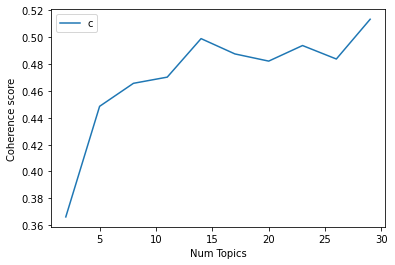

In [33]:
# Show graph
limit=30; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [31]:
coherence_values

[0.3661880661298129,
 0.44850857050359566,
 0.46563304519315596,
 0.4702406124935872,
 0.4989005934927482,
 0.487518653374635,
 0.48216507313350093,
 0.4937556528858266,
 0.4837294145138727,
 0.5133284794381117]

In [34]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3662
Num Topics = 5  has Coherence Value of 0.4485
Num Topics = 8  has Coherence Value of 0.4656
Num Topics = 11  has Coherence Value of 0.4702
Num Topics = 14  has Coherence Value of 0.4989
Num Topics = 17  has Coherence Value of 0.4875
Num Topics = 20  has Coherence Value of 0.4822
Num Topics = 23  has Coherence Value of 0.4938
Num Topics = 26  has Coherence Value of 0.4837
Num Topics = 29  has Coherence Value of 0.5133


In [61]:
# Select the model and print the topics
optimal_model = model_list[9]
model_topics = optimal_model.show_topics(formatted=False)
print(len(optimal_model.print_topics()))
pprint(optimal_model.print_topics())

20
[(11,
  '0.068*"blog" + 0.055*"post" + 0.035*"urllink" + 0.025*"site" + 0.020*"link" '
  '+ 0.019*"email" + 0.017*"comment" + 0.015*"check" + 0.015*"http" + '
  '0.015*"read"'),
 (14,
  '0.035*"say" + 0.013*"citi" + 0.011*"offic" + 0.010*"tell" + 0.007*"call" + '
  '0.007*"street" + 0.006*"polic" + 0.006*"place" + 0.006*"area" + '
  '0.006*"send"'),
 (18,
  '0.077*"smoke" + 0.063*"drink" + 0.060*"drug" + 0.038*"addict" + '
  '0.024*"alcohol" + 0.020*"kelli" + 0.020*"cigarett" + 0.016*"henri" + '
  '0.013*"firework" + 0.013*"flash"'),
 (28,
  '0.040*"know" + 0.037*"love" + 0.031*"feel" + 0.029*"want" + 0.023*"life" + '
  '0.022*"think" + 0.022*"like" + 0.020*"time" + 0.019*"thing" + '
  '0.019*"friend"'),
 (25,
  '0.040*"jason" + 0.038*"josh" + 0.037*"mike" + 0.030*"nick" + 0.025*"brian" '
  '+ 0.024*"thoma" + 0.023*"david" + 0.017*"eric" + 0.017*"angel" + '
  '0.017*"kevin"'),
 (26,
  '0.017*"american" + 0.015*"state" + 0.013*"countri" + 0.013*"bush" + '
  '0.013*"nation" + 0.012*"g